In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formula-1-world-championship-1950-2020/races.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv
/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv
/kaggle/input/formula-1-world-championship-1950-2020/status.csv
/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv
/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv
/kaggle/input/formula-1-world-championship-1950-2020/sprint_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/results.csv
/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv
/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv


In [2]:
races=pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/races.csv")
drivers=pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv")
constructors=pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv")
results=pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/results.csv")



In [3]:
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [4]:
races['name'].unique()[0:10]

array(['Australian Grand Prix', 'Malaysian Grand Prix',
       'Chinese Grand Prix', 'Bahrain Grand Prix', 'Spanish Grand Prix',
       'Monaco Grand Prix', 'Turkish Grand Prix', 'British Grand Prix',
       'German Grand Prix', 'Hungarian Grand Prix'], dtype=object)

In [5]:
DF1=pd.Series(races['name'][0:26],name="grand prix")
DF3=pd.Series(races['name'][0:51],name='grand prix 2')
DF2=pd.DataFrame(DF1,columns=['grand prix'])
DF4=pd.DataFrame(DF3,columns=['grand prix 2'])
DF2
DF4

,grand prix 2
0,Australian Grand Prix
1,Malaysian Grand Prix
2,Chinese Grand Prix
3,Bahrain Grand Prix
4,Spanish Grand Prix
5,Monaco Grand Prix
6,Turkish Grand Prix
7,British Grand Prix
8,German Grand Prix
9,Hungarian Grand Prix


<Axes: xlabel='grand prix'>

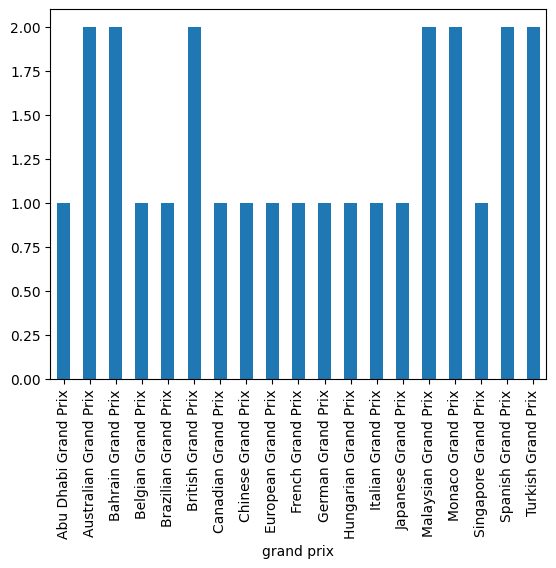

In [6]:
DF2.groupby('grand prix').size().plot(kind='bar')

<Axes: xlabel='grand prix 2'>

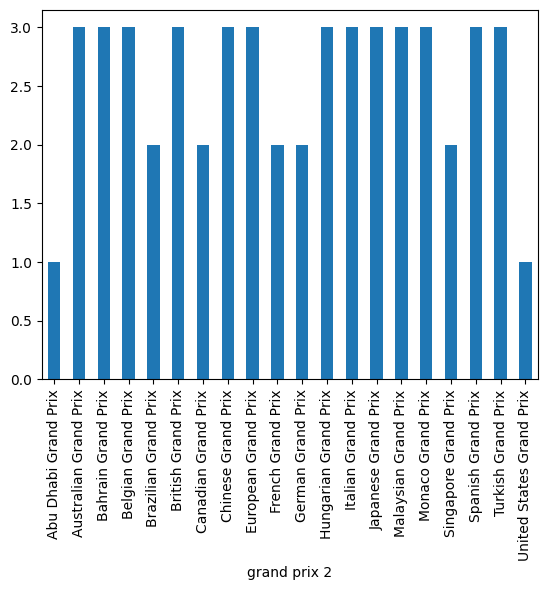

In [7]:

DF4.groupby('grand prix 2').size().plot(kind='bar')

In [8]:
End_results=pd.merge(races,results,on='raceId')
End_results=pd.merge(End_results,drivers,on='driverId')
End_results=pd.merge(End_results,constructors,on='constructorId')




In [9]:
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
210,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [10]:
print(End_results.columns.tolist() )

['raceId', 'year', 'round', 'circuitId', 'name_x', 'date', 'time_x', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'resultId', 'driverId', 'constructorId', 'number_x', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_y', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code', 'forename', 'surname', 'dob', 'nationality_x', 'url_y', 'constructorRef', 'name_y', 'nationality_y', 'url']


In [11]:
End_results['podium_finish'] = (End_results['positionOrder'] <= 3).astype(int)
End_results['driver_name']=End_results['forename']+" "+End_results['surname']

In [12]:
REQ_colmuns=['raceId', 'year', 'round', 'circuitId', 'grid', 'position',
                    'points', 'laps', 'fastestLapSpeed', 'driverId', 'driver_name',
                    'constructorId', 'podium_finish']
End_results=End_results[REQ_colmuns]

In [13]:
End_results

,raceId,year,round,circuitId,grid,position,points,laps,fastestLapSpeed,driverId,driver_name,constructorId,podium_finish
0,1,2009,1,1,1,1,10.0,58,216.891,18,Jenson Button,23,1
1,1,2009,1,1,2,2,8.0,58,214.344,22,Rubens Barrichello,23,1
2,1,2009,1,1,20,3,6.0,58,214.706,15,Jarno Trulli,7,1
3,1,2009,1,1,19,4,5.0,58,215.920,10,Timo Glock,7,0
4,1,2009,1,1,10,5,4.0,58,215.199,4,Fernando Alonso,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,1144,2024,24,24,14,16,0.0,57,222.002,825,Kevin Magnussen,210,0
26755,1144,2024,24,24,12,17,0.0,55,214.212,859,Liam Lawson,215,0
26756,1144,2024,24,24,9,\N,0.0,30,212.462,822,Valtteri Bottas,15,0
26757,1144,2024,24,24,20,\N,0.0,26,212.631,861,Franco Colapinto,3,0


In [15]:
End_results.isnull().sum()

raceId             0
year               0
round              0
circuitId          0
grid               0
position           0
points             0
laps               0
fastestLapSpeed    0
driverId           0
driver_name        0
constructorId      0
podium_finish      0
dtype: int64

In [16]:
End_results.duplicated().sum()

0

<Axes: xlabel='nationality'>

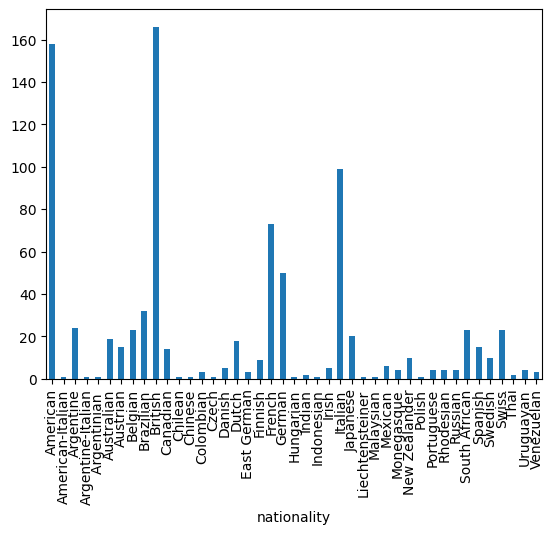

In [17]:
drivers.groupby("nationality").size().plot(kind="bar")

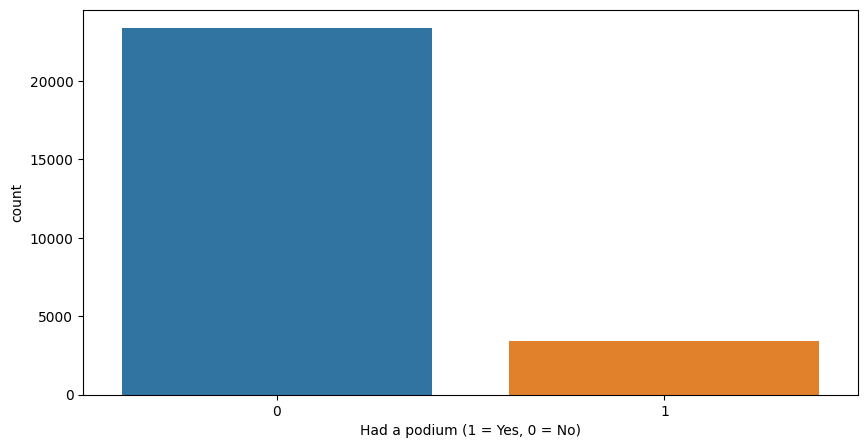

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=End_results,x='podium_finish')
plt.xlabel("Had a podium (1 = Yes, 0 = No)")
plt.ylabel("count")
plt.show()

In [18]:
constructors


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
210,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


<Axes: title={'center': 'Constructers in  F1 '}>

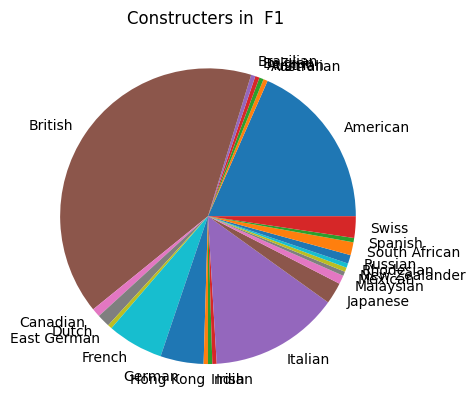

In [19]:
constructors.groupby("nationality").size().plot(kind="pie",title="Constructers in  F1 ")

<Axes: xlabel='nationality'>

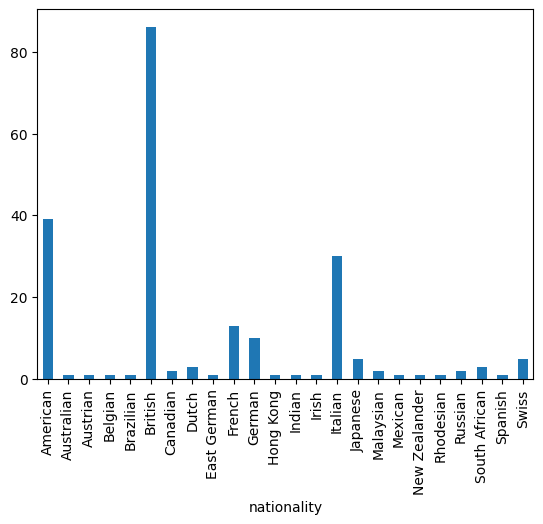

In [20]:
constructors.groupby("nationality").size().plot(kind="bar")

In [21]:
constructors["nationality"].unique()

array(['British', 'German', 'French', 'Italian', 'Japanese', 'Austrian',
       'Indian', 'Dutch', 'Russian', 'Swiss', 'Irish', 'Hong Kong',
       'Brazilian', 'Canadian', 'Mexican', 'American', 'Australian',
       'New Zealander', 'South African', 'Rhodesian', 'Belgian',
       'East German', 'Spanish', 'Malaysian'], dtype=object)

In [22]:
df3=pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv")


In [23]:
df3

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13386,28978,1144,15,4.0,10,10,0
13387,28979,1144,210,58.0,7,7,0
13388,28980,1144,215,46.0,8,8,0
13389,28981,1144,3,17.0,9,9,0


In [24]:
df3['constructorId'].nunique()

160

In [25]:
df4=pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv")

In [26]:
df4

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12620,17125,1144,210,4.0,\N
12621,17126,1144,117,2.0,\N
12622,17127,1144,3,0.0,\N
12623,17128,1144,215,0.0,\N


In [27]:
End_results

,raceId,year,round,circuitId,grid,position,points,laps,fastestLapSpeed,driverId,driver_name,constructorId,podium_finish
0,1,2009,1,1,1,1,10.0,58,216.891,18,Jenson Button,23,1
1,1,2009,1,1,2,2,8.0,58,214.344,22,Rubens Barrichello,23,1
2,1,2009,1,1,20,3,6.0,58,214.706,15,Jarno Trulli,7,1
3,1,2009,1,1,19,4,5.0,58,215.920,10,Timo Glock,7,0
4,1,2009,1,1,10,5,4.0,58,215.199,4,Fernando Alonso,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,1144,2024,24,24,14,16,0.0,57,222.002,825,Kevin Magnussen,210,0
26755,1144,2024,24,24,12,17,0.0,55,214.212,859,Liam Lawson,215,0
26756,1144,2024,24,24,9,\N,0.0,30,212.462,822,Valtteri Bottas,15,0
26757,1144,2024,24,24,20,\N,0.0,26,212.631,861,Franco Colapinto,3,0


In [28]:
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
210,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [29]:
type(constructors)

pandas.core.frame.DataFrame

In [30]:
End_results.head(5)

,raceId,year,round,circuitId,grid,position,points,laps,fastestLapSpeed,driverId,driver_name,constructorId,podium_finish
0,1,2009,1,1,1,1,10.0,58,216.891,18,Jenson Button,23,1
1,1,2009,1,1,2,2,8.0,58,214.344,22,Rubens Barrichello,23,1
2,1,2009,1,1,20,3,6.0,58,214.706,15,Jarno Trulli,7,1
3,1,2009,1,1,19,4,5.0,58,215.920,10,Timo Glock,7,0
4,1,2009,1,1,10,5,4.0,58,215.199,4,Fernando Alonso,4,0


**Correlations b/w columns**

In [31]:
req_results=End_results.copy()
req_col=['grid','position','points','fastestLapSpeed','podium_finish']
for col in  req_col:
    req_results[col]=req_results[col].replace('//N',np.nan)
    req_results[col]=pd.to_numeric(req_results[col],errors='coerce')


corr = req_results[col].corr(method='pearson')


plt.figure(figsize=(14,12))
sns.heatmap(corr,annot=True,cmap="coolwarm",vmin=-1, vmax=1, center=0)
plt.title("Correlation b/w the num features")
plt.show()

TypeError: Series.corr() missing 1 required positional argument: 'other'

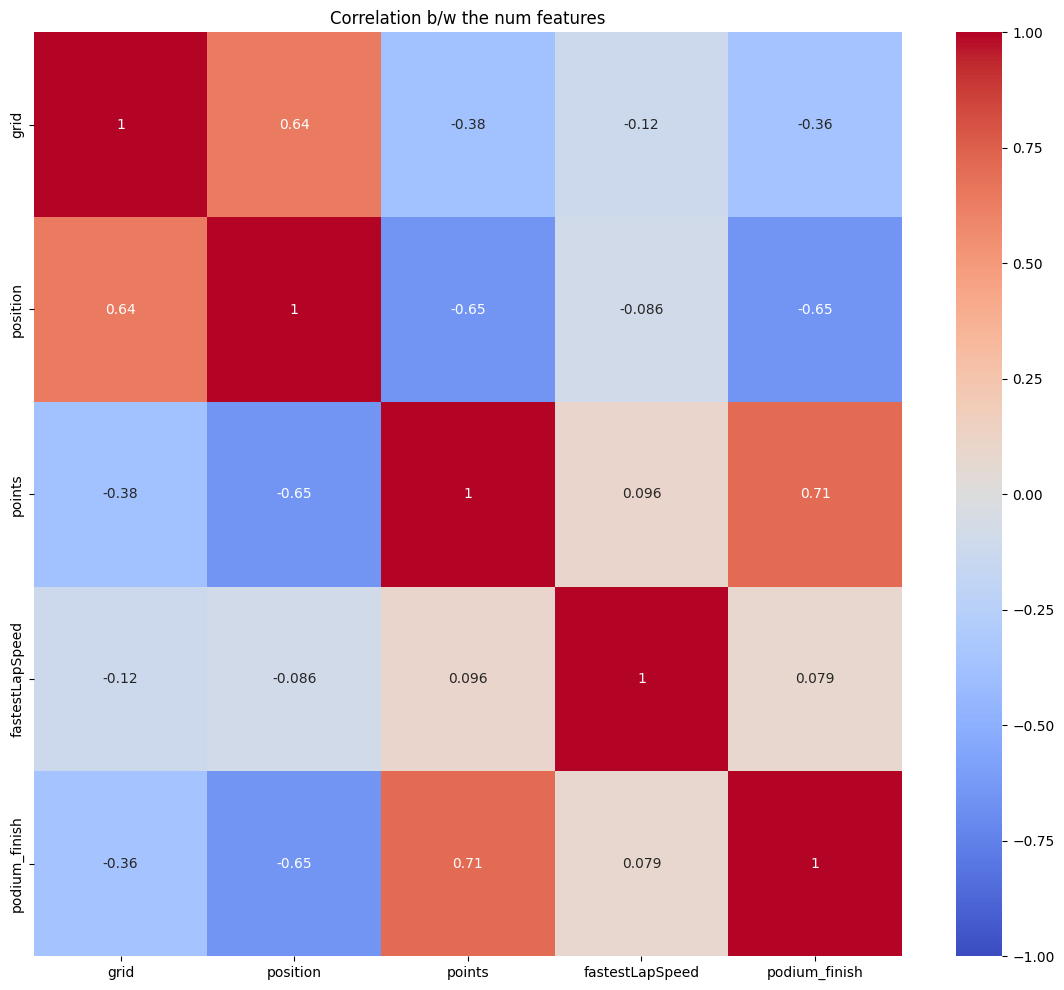

In [39]:
numeric_cols = req_results[req_col].select_dtypes(include=['number'])

corr = numeric_cols.corr(method='pearson', min_periods=1)

plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Correlation b/w the num features")
plt.show()


In [ ]:
corr

**TOP 10 constructers**



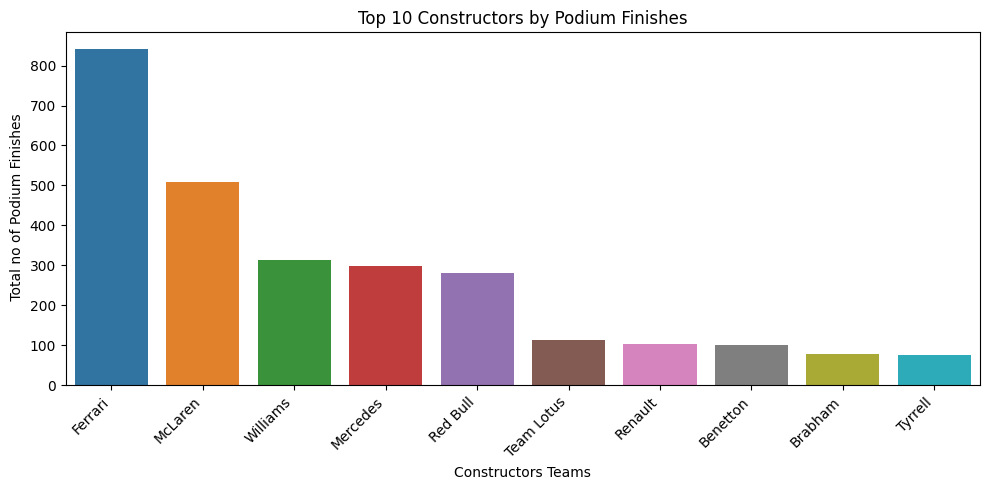

In [40]:
Top_constructors=End_results.groupby('constructorId')['podium_finish'].sum().sort_values(ascending=False).head(10)
Top_constructors=Top_constructors.reset_index()
Top_constructors = pd.merge(Top_constructors, constructors[['constructorId', 'name']], on='constructorId')

plt.figure(figsize=(10, 5))
sns.barplot(x='name', y='podium_finish', data=Top_constructors)
plt.title('Top 10 Constructors by Podium Finishes')
plt.xlabel('Constructors Teams')
plt.ylabel(' Total no of Podium Finishes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

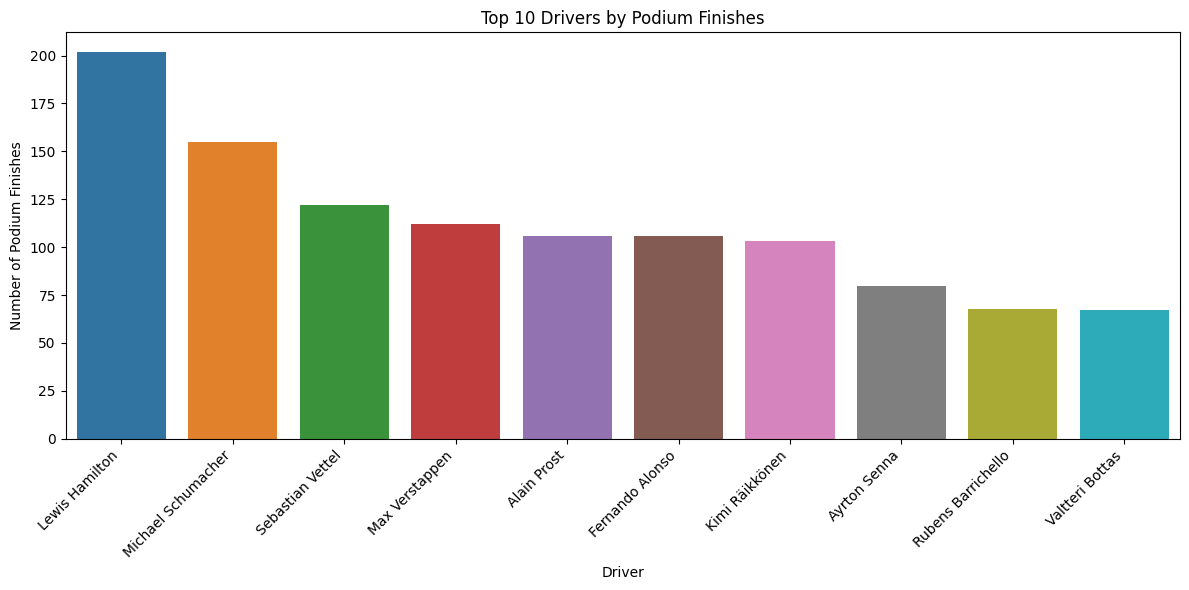

In [41]:
Top_drivers=End_results.groupby('driver_name')['podium_finish'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=Top_drivers.index, y=Top_drivers.values)
plt.title('Top 10 Drivers by Podium Finishes')
plt.xlabel('Driver')
plt.ylabel('Number of Podium Finishes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


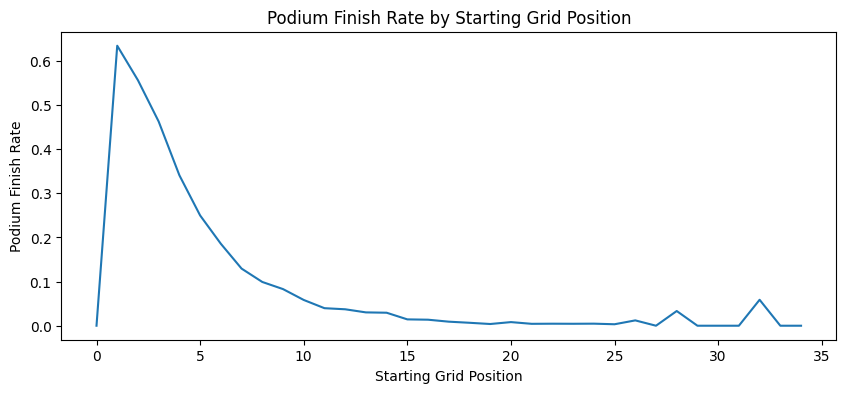

In [32]:
podium_rate = End_results.groupby('grid')['podium_finish'].mean()
plt.figure(figsize=(10, 4))
sns.lineplot(x=podium_rate.index, y=podium_rate.values)
plt.title('Podium Finish Rate by Starting Grid Position')
plt.xlabel('Starting Grid Position')
plt.ylabel('Podium Finish Rate')
plt.show()

In [33]:
top_drivers=End_results.groupby('driver_name')['points'].sum().nlargest(5).index

In [34]:
top_drivers_data=End_results[End_results['driver_name'].isin(top_drivers)]

In [35]:
plt.figure(figsize=(14,8))
for driver in top_drivers:
    driver_data=top_drivers_data[top_drivers_data['driver_name']== driver]
    yearly_points=driver_data.groupby('year')['points'].sum()
    

<Figure size 1400x800 with 0 Axes>

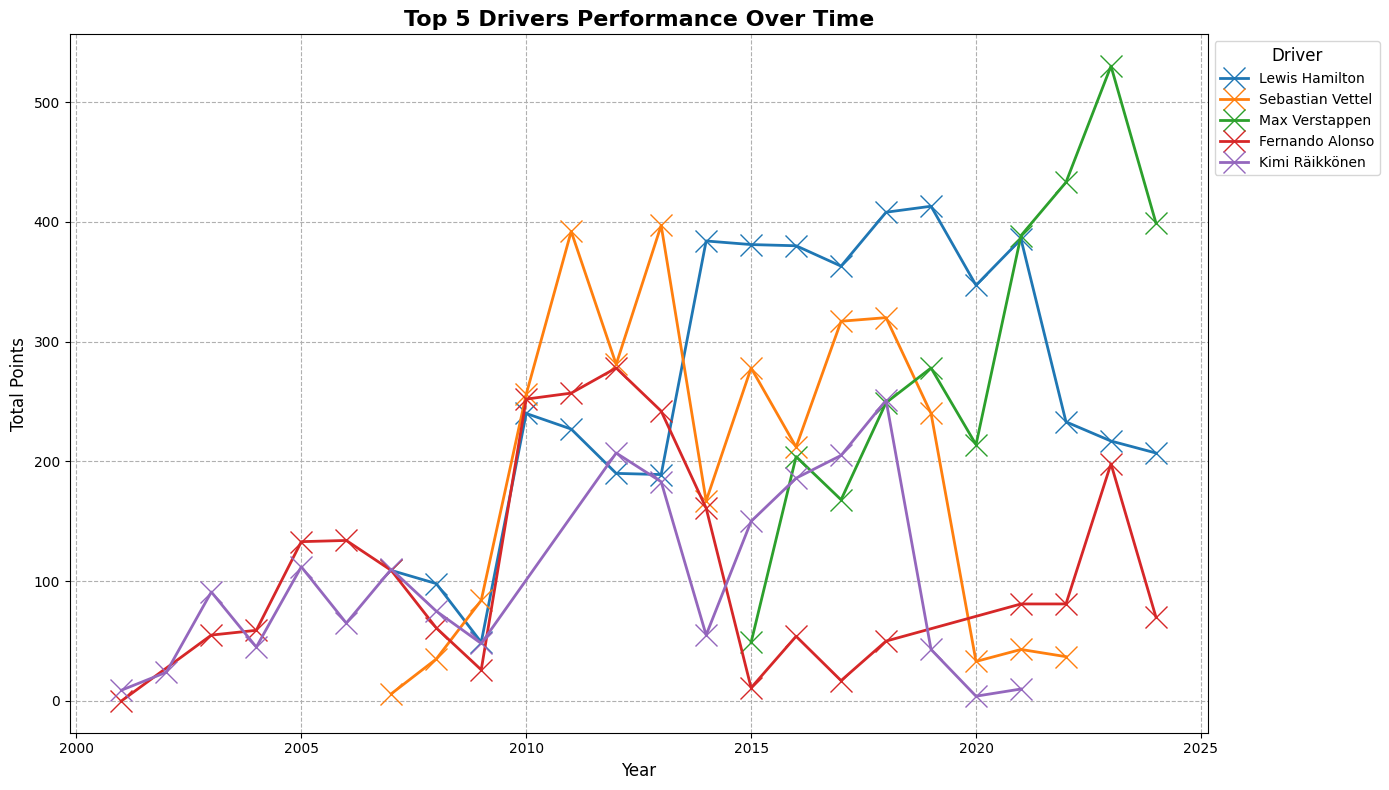

In [36]:
plt.figure(figsize=(14, 8))
for driver in top_drivers:
    driver_data = top_drivers_data[top_drivers_data['driver_name'] == driver]
    yearly_points = driver_data.groupby('year')['points'].sum()
    plt.plot(yearly_points.index, yearly_points.values, marker='x', linewidth=2, markersize=16, label=driver)
    plt.title('Top 5 Drivers Performance Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Points', fontsize=12)
plt.legend(title='Driver', title_fontsize='12', fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=1.0)
plt.tight_layout()
plt.show()

    

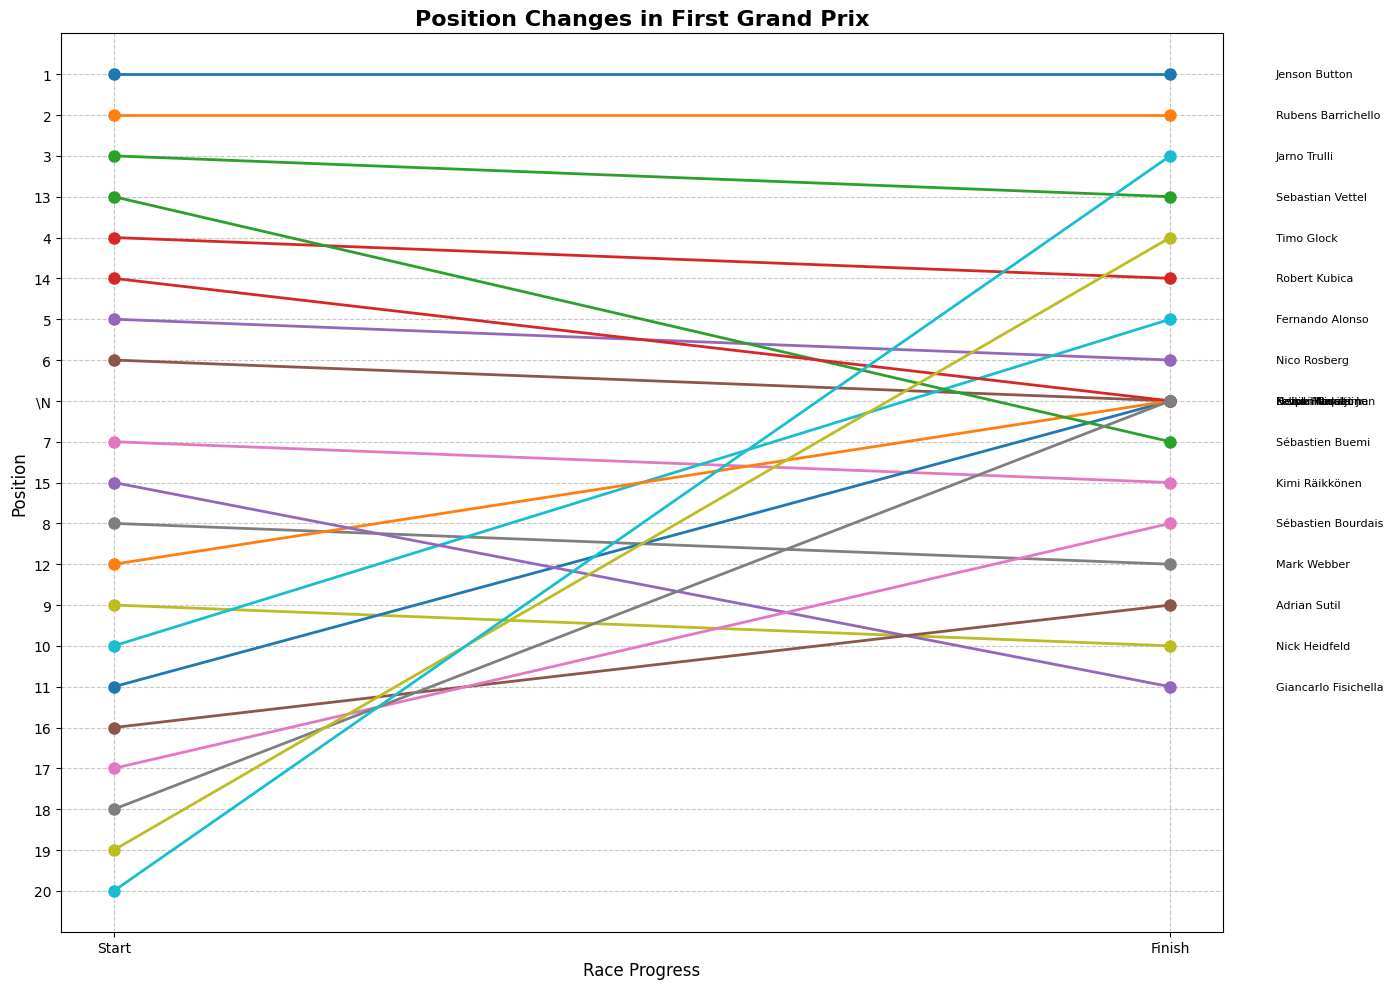

In [37]:
first_race = End_results['raceId'].min()
latest_race = End_results['raceId'].max()

race_data = End_results[End_results['raceId'] == first_race].sort_values('grid')
race_data2 = End_results[End_results['raceId'] == latest_race].sort_values('grid')

plt.figure(figsize=(14, 10))
for _, driver in race_data.iterrows():
    plt.plot([1, 2], [driver['grid'], driver['position']], '-o', linewidth=2, markersize=8)
    plt.text(2.1, driver['position'], driver['driver_name'], fontsize=8, verticalalignment='center')

plt.title(f'Position Changes in First Grand Prix', fontsize=16, fontweight='bold')
plt.xlabel('Race Progress', fontsize=12)
plt.ylabel('Position', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis so that 1st position is at the top
plt.xticks([1, 2], ['Start', 'Finish'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [38]:
race_data.head()

,raceId,year,round,circuitId,grid,position,points,laps,fastestLapSpeed,driverId,driver_name,constructorId,podium_finish
0,1,2009,1,1,1,1,10.0,58,216.891,18,Jenson Button,23,1
1,1,2009,1,1,2,2,8.0,58,214.344,22,Rubens Barrichello,23,1
12,1,2009,1,1,3,13,0.0,56,216.596,20,Sebastian Vettel,9,0
13,1,2009,1,1,4,14,0.0,55,216.970,9,Robert Kubica,2,0
5,1,2009,1,1,5,6,3.0,58,217.668,3,Nico Rosberg,3,0


In [77]:
latest_race

1144